<a href="https://colab.research.google.com/github/khw51793/OpenCV/blob/main/Image_Processing_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

알고리즘이란 디지털 이미지나 영상을 처리, 분석, 변환, 또는 해석하기 위해 설계된 일련의 체계적 절차나 규칙이다. 이 알고리즘들은 픽셀 단위로 데이터를 다루며, 특정 작업을 수행하거나 문제를 해결하는 데 사용된다.

In [3]:
!python --version

Python 3.10.12


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

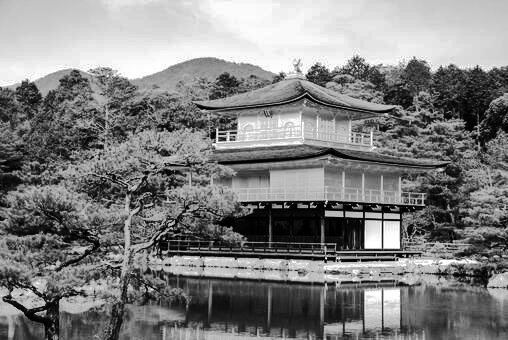

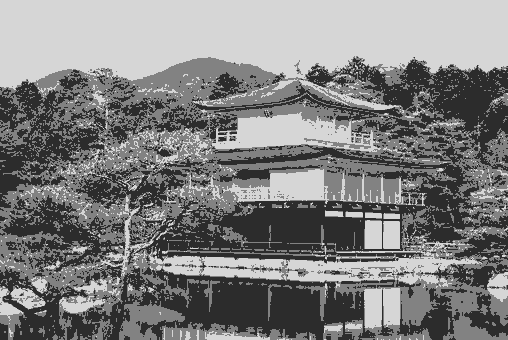

In [8]:
# 이미지 불러오기
img = cv2.imread('/content/gdrive/MyDrive/sample.jpeg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path and permissions.")
else:
    # 이미지를 Grayscale로 변환
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 히스토그램 균일화 적용
    equalized_img = cv2.equalizeHist(gray_img)
    cv2_imshow(equalized_img)

    # K-means 클러스터링을 위한 준비
    equalized_img_2D = equalized_img.reshape((-1, 1))
    equalized_img_2D = np.float32(equalized_img_2D)

    # K-means 클러스터링 조건 설정
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    K = 3  # 클러스터 개수 설정
    _, labels, centers = cv2.kmeans(equalized_img_2D, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # 클러스터 결과 이미지를 생성
    centers = np.uint8(centers)
    segmented_img = centers[labels.flatten()].reshape(equalized_img.shape)
    cv2_imshow(segmented_img)

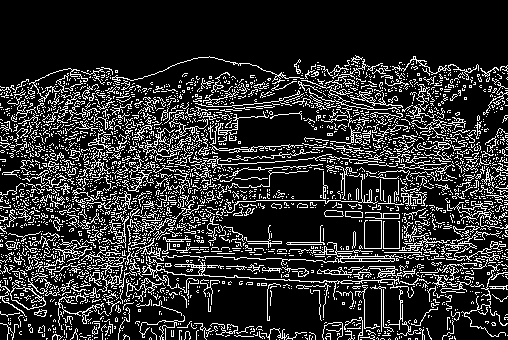

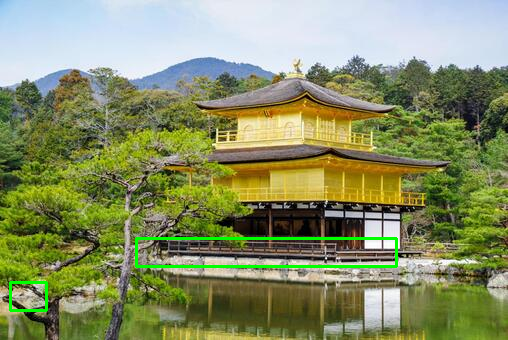

In [9]:
# Canny 엣지 검출
edges = cv2.Canny(segmented_img, 50, 150)
cv2_imshow(edges)

# 윤곽선 검출 및 경계 상자 그리기
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) > 300:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img)


Area: 493.0, Center: (26, 297)
Area: 340.0, Center: (339, 257)


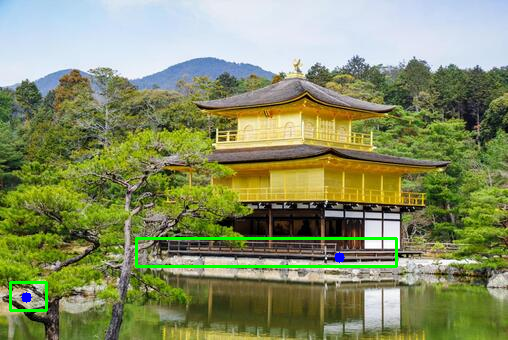

In [10]:
# 객체 특성 분석
for contour in contours:
    if cv2.contourArea(contour) > 300:
        # 객체 면적 계산
        area = cv2.contourArea(contour)

        # 객체 중심 좌표 계산
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)  # 중심 좌표 표시

        # 객체 정보 출력
        print(f"Area: {area}, Center: ({cX}, {cY})")

cv2_imshow(img)